# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: `Zeynab Mottaqi`
2.   Student Number: `99206203`


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('~/Downloads/content/user_artists.dat', sep='\t')
artists = pd.read_csv('~/Downloads/content/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [3]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################
artist_id = plays["artistID"]
plays.columns = plays.columns.str.replace('artistID', 'id')
plays = pd.concat([plays, artist_id], axis=1)

# Perform merge
ap = pd.merge(plays, artists, on='id', how='outer')
ap.sort_values(by=['id'], inplace=True)

# rearrange the columns
new_cols = ['id', 'name', 'userID', 'artistID', 'weight']
ap = ap.reindex(columns=new_cols)
ap.reset_index(drop = True)

,id,name,userID,artistID,weight
0,1,MALICE MIZER,785,1,76
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,34,1,212
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [4]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [5]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

#TODO
ap.drop(columns=['id'], inplace=True)
ap.reset_index(drop = True)

,name,userID,artistID,playCount
0,MALICE MIZER,785,1,76
1,MALICE MIZER,274,1,483
2,MALICE MIZER,34,1,212
3,Diary of Dreams,135,2,1021
4,Diary of Dreams,257,2,152
...,...,...,...,...
92829,Diamanda Galás,454,18741,301
92830,Aya RL,454,18742,294
92831,Coptic Rain,454,18743,287
92832,Oz Alchemist,454,18744,286


In [6]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


unique_names = np.array(ap.name.unique()).flatten()

ln = len(unique_names)
totalUniqueUsers_arr = np.empty(shape=ln)
totalArtistPlays_arr = np.empty(shape=ln)
avgUserPlays_arr = np.empty(shape=ln)


for index, name in enumerate(unique_names):
  filter = (ap.loc[ap['name'] == name])
  totalUniqueUsers_arr[index] = len(filter.userID.unique())
  totalArtistPlays_arr[index] = sum(filter.playCount)
  avgUserPlays_arr[index] = totalArtistPlays_arr[index]/totalUniqueUsers_arr[index]

z = np.array([unique_names, totalUniqueUsers_arr, totalArtistPlays_arr, avgUserPlays_arr]).transpose()
artist_rank = pd.DataFrame(data=z, columns=['name','totalUniqueUsers', 'totalArtistPlays', 'avgUserPlays'])
artist_rank.sort_values(by=['totalArtistPlays'], inplace=True, ascending=False, ignore_index=True)
artist_rank

,name,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,Britney Spears,522.0,2393140.0,4584.559387
1,Depeche Mode,282.0,1301308.0,4614.567376
2,Lady Gaga,611.0,1291387.0,2113.563011
3,Christina Aguilera,407.0,1058405.0,2600.503686
4,Paramore,399.0,963449.0,2414.659148
...,...,...,...,...
17627,K-Precise,1.0,1.0,1.0
17628,ZÜNDER,1.0,1.0,1.0
17629,Evil Masquerade,1.0,1.0,1.0
17630,Gosling,1.0,1.0,1.0


In [7]:
artist_rank

,name,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,Britney Spears,522.0,2393140.0,4584.559387
1,Depeche Mode,282.0,1301308.0,4614.567376
2,Lady Gaga,611.0,1291387.0,2113.563011
3,Christina Aguilera,407.0,1058405.0,2600.503686
4,Paramore,399.0,963449.0,2414.659148
...,...,...,...,...
17627,K-Precise,1.0,1.0,1.0
17628,ZÜNDER,1.0,1.0,1.0
17629,Evil Masquerade,1.0,1.0,1.0
17630,Gosling,1.0,1.0,1.0


In [8]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################

ap = pd.merge(ap, artist_rank, on='name', how='inner')

In [9]:
ap.head(20)

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,MALICE MIZER,785,1,76,3.0,771.0,257.0
1,MALICE MIZER,274,1,483,3.0,771.0,257.0
2,MALICE MIZER,34,1,212,3.0,771.0,257.0
3,Diary of Dreams,135,2,1021,12.0,8012.0,667.666667
4,Diary of Dreams,257,2,152,12.0,8012.0,667.666667
5,Diary of Dreams,325,2,3466,12.0,8012.0,667.666667
6,Diary of Dreams,397,2,56,12.0,8012.0,667.666667
7,Diary of Dreams,560,2,134,12.0,8012.0,667.666667
8,Diary of Dreams,580,2,803,12.0,8012.0,667.666667
9,Diary of Dreams,1551,2,868,12.0,8012.0,667.666667


# Exploration

In [10]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x=x[:20], y=y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show()

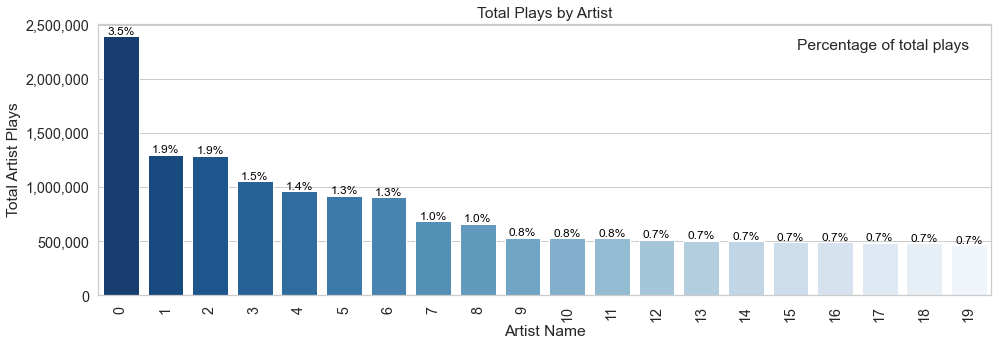

In [11]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

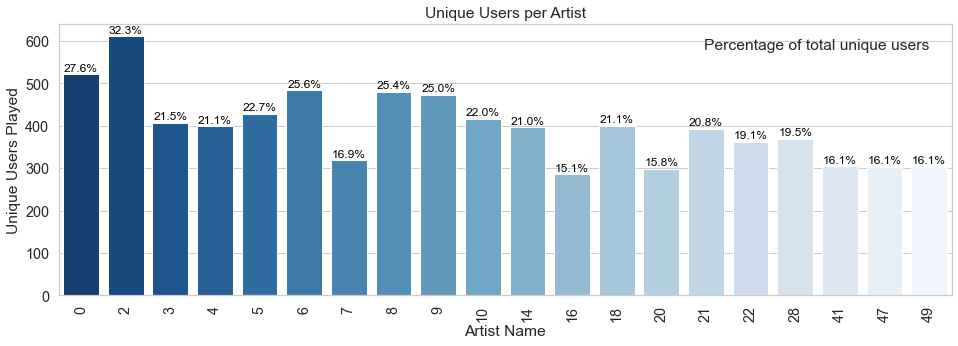

In [12]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

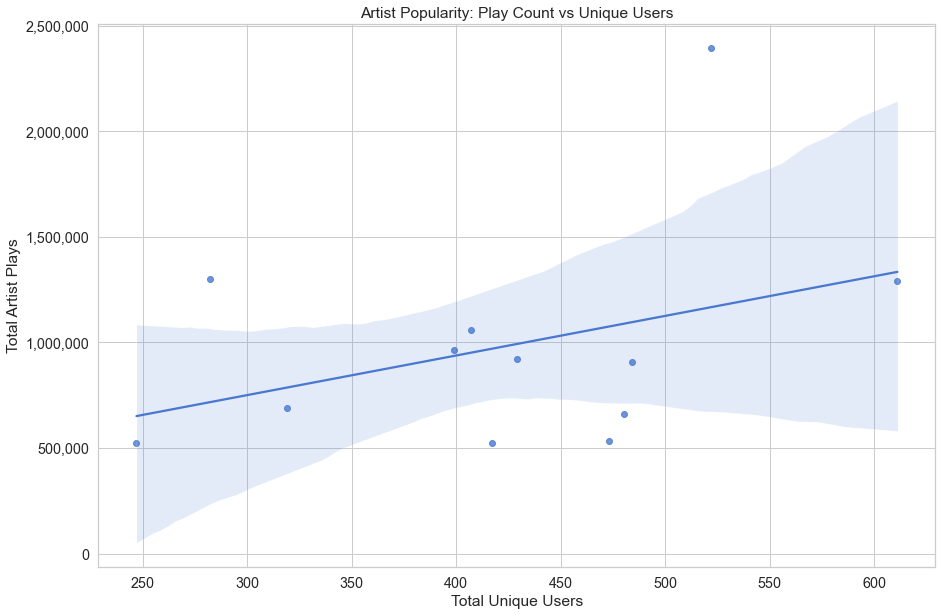

In [13]:
top_artists =  artist_rank.sort_values(['totalArtistPlays'],ascending=False).head(12) # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = top_artists['totalUniqueUsers'].astype('float64', copy=False)# TODO : "totalUniqueUsers" of "artist_rank"
y =  top_artists['totalArtistPlays'].astype('float', copy=False)# TODO :  "totalArtistPlays" of "artist_rank"
labels =  top_artists.index# TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x=x,y=y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [14]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [74]:
ap

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
0,MALICE MIZER,785,1,76,3.0,771.0,257.0,0.000213
1,MALICE MIZER,274,1,483,3.0,771.0,257.0,0.001367
2,MALICE MIZER,34,1,212,3.0,771.0,257.0,0.000598
3,Diary of Dreams,135,2,1021,12.0,8012.0,667.666667,0.002892
4,Diary of Dreams,257,2,152,12.0,8012.0,667.666667,0.000428
...,...,...,...,...,...,...,...,...
92829,Diamanda Galás,454,18741,301,1.0,301.0,301.0,0.000851
92830,Aya RL,454,18742,294,1.0,294.0,294.0,0.000831
92831,Coptic Rain,454,18743,287,1.0,287.0,287.0,0.000811
92832,Oz Alchemist,454,18744,286,1.0,286.0,286.0,0.000808


In [76]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################
ratings_df = ap.pivot_table(values='playCountScaled', index='userID', columns='artistID')# Your Code
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################


ratings = ratings_df.fillna(0).to_numpy(dtype=np.float64) # Your Code
ratings

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 408., ...,   0.,   0.,   0.]])

In [34]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
non_zero = np.count_nonzero(ratings)
total_size = np.product(ratings.shape)
sparsity = (total_size - non_zero) / total_size
sparsity
## END

0.9972362497745786

# Fitting(Training) Model (50pts)

In [205]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    # TODO
    # filter out the rows with at leats MIN_USER_RATINGS nonzero values
    filtered_ratings = ratings[np.count_nonzero(ratings, axis=1) >= MIN_USER_RATINGS]

    # create the same size train and validation arrays
    mid = filtered_ratings.shape[0]//2
    train = filtered_ratings[:mid]
    validation = filtered_ratings[mid:]

    # in order to randomly pich a row from train set and add it to validation set
    # we can first shuffle the whole rows filtered_ratings and then pop DELETE_RATING_COUNT rows from the end of it.
    r = np.arange(train.shape[0])
    np.random.shuffle(r)
    delete_arr = r[:DELETE_RATING_COUNT]

    # append random DELETE_RATING_COUNT rows `r` to validation
    validation = np.vstack((validation, train[delete_arr]))

    # remove the same rows `r` from train set
    train = np.delete(train, delete_arr, axis=0)


    return train, validation

In [206]:
train, val = train_test_split(ratings)

In [207]:
train.shape, val.shape

((909, 17632), (939, 17632))

In [208]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    prediction = prediction[prediction != 0]# TODO
    ground_truth = ground_truth[ground_truth != 0]# TODO
    return sqrt(mean_squared_error(prediction, ground_truth))

In [ ]:
class Recommender:

  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
    self.train_loss = []
    self.val_loss = []
  
  def predictions(self, P, Q):
    return np.dot(Q.T, P) #TODO : create the prediction matrix
  
  def fit(self, X_train, X_val):
    train_loss = []
    q_train = np.empty(shape=(909, 909))
    p_train = np.empty(shape=(909, 17632))
    for ep in range(self.n_epochs):
      #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
      train_err = (X_train - self.predictions(p_train, q_train))**2
      q_train += self.learning_rate * (train_err * p_train - self.lmbda * q_train)
      p_train += self.learning_rate * (train_err * q_train - self.lmbda * p_train)
      #TODO : save the loss on train and validation data in each iteration

  return self

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index

In [ ]:
#creating recommender object
recommender = Recommender().fit(train, val)

In [ ]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################

#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [ ]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [ ]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [ ]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

In [ ]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**